      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1              2          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2              3          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3              4          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4              5          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...          ...        ...         ...                                   ...   
9995        9996       9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9996        9997       9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9997        9998       9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9998        9999       9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
9999       10000      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                           

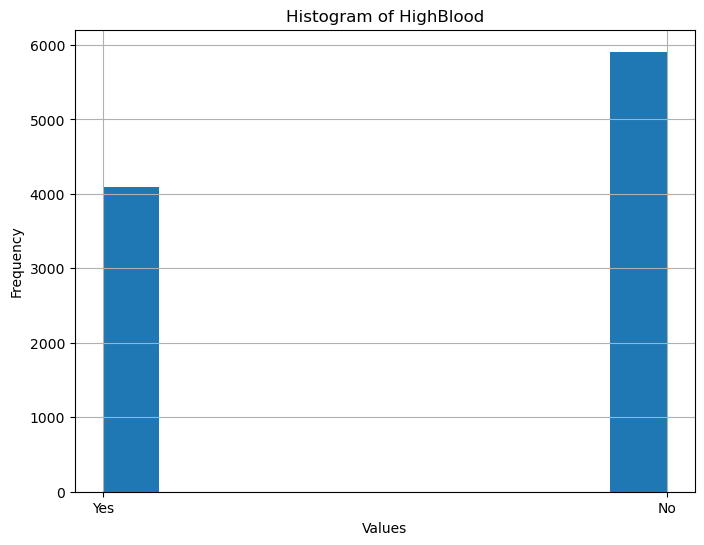

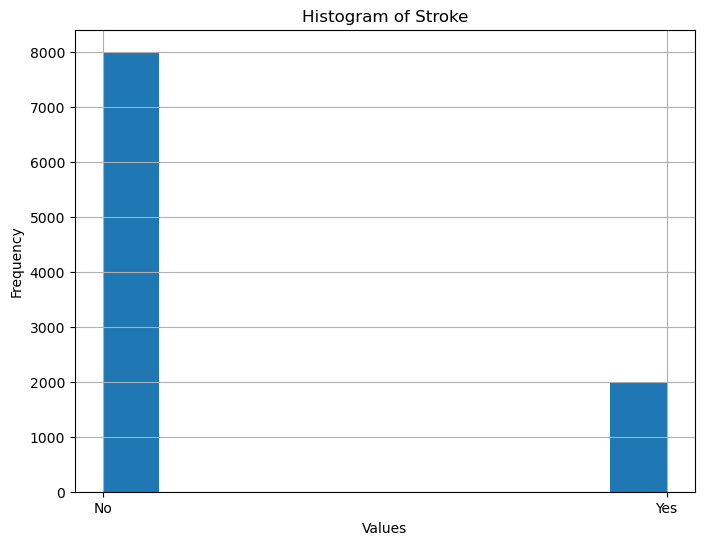

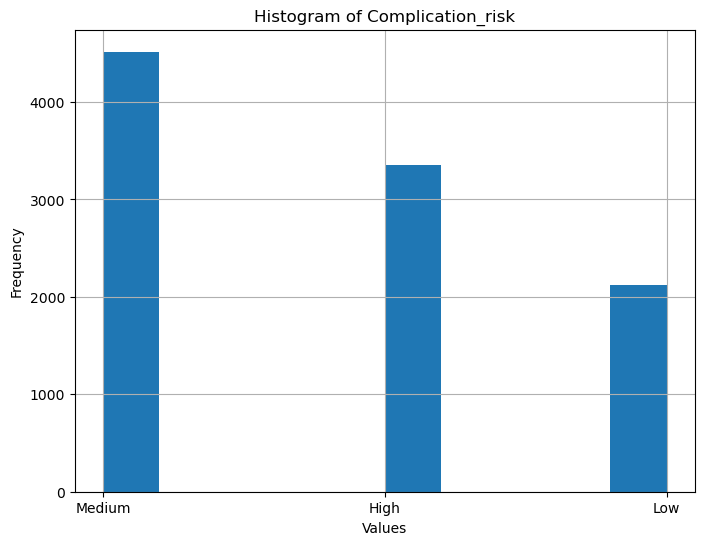

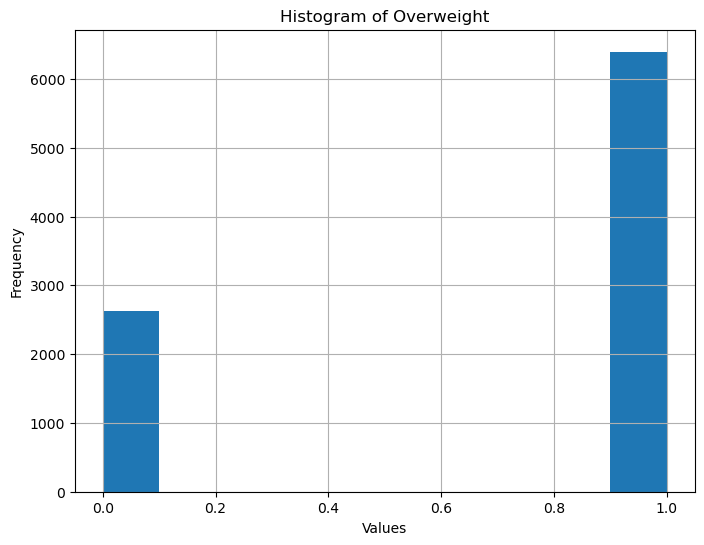

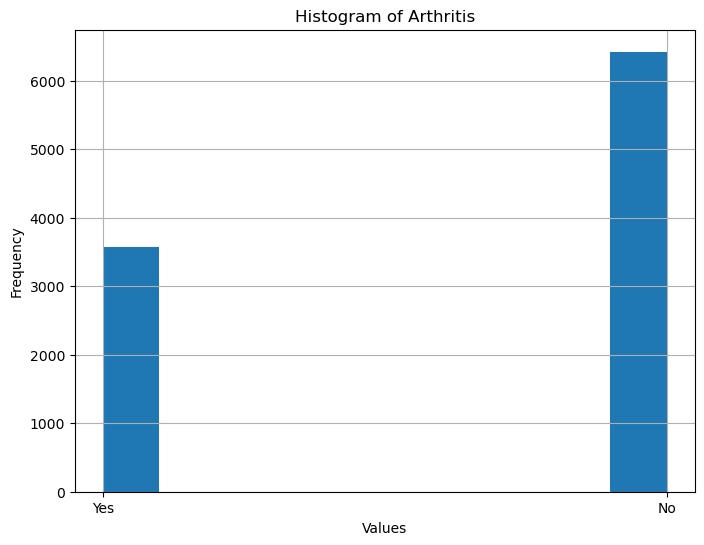

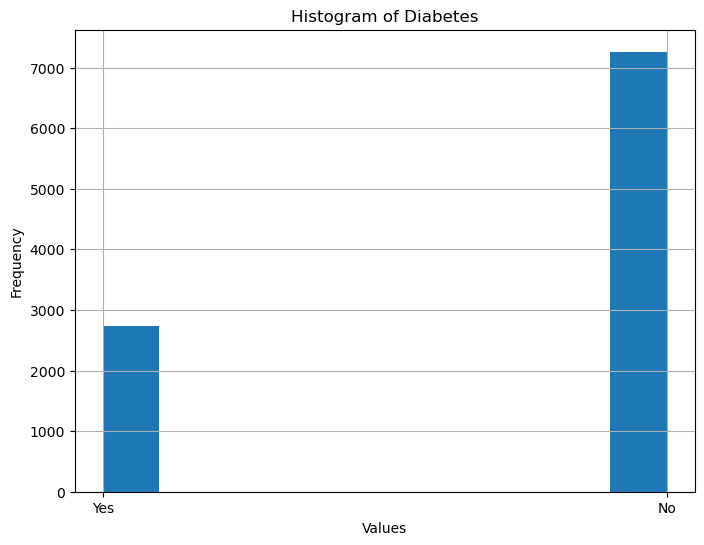

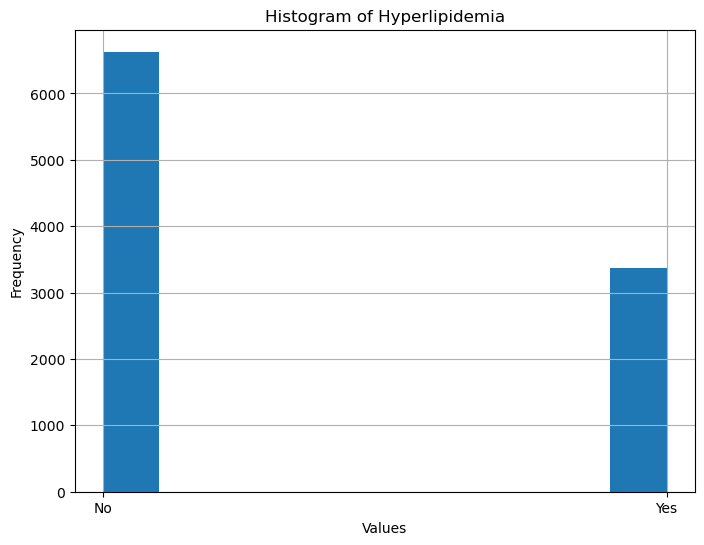

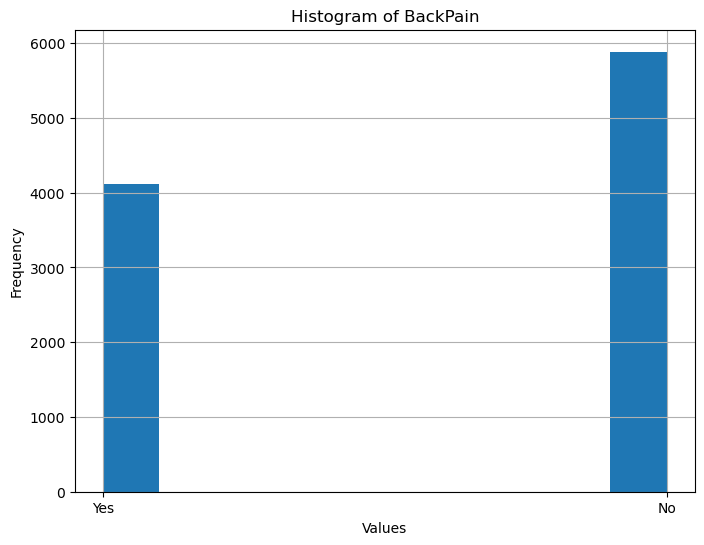

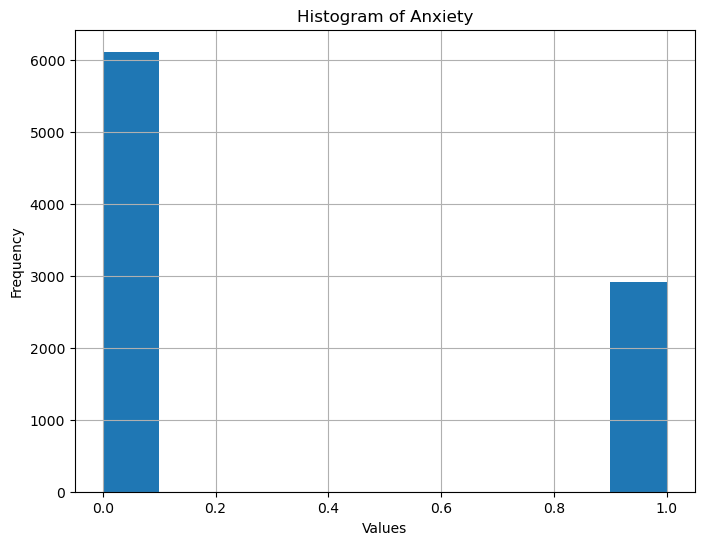

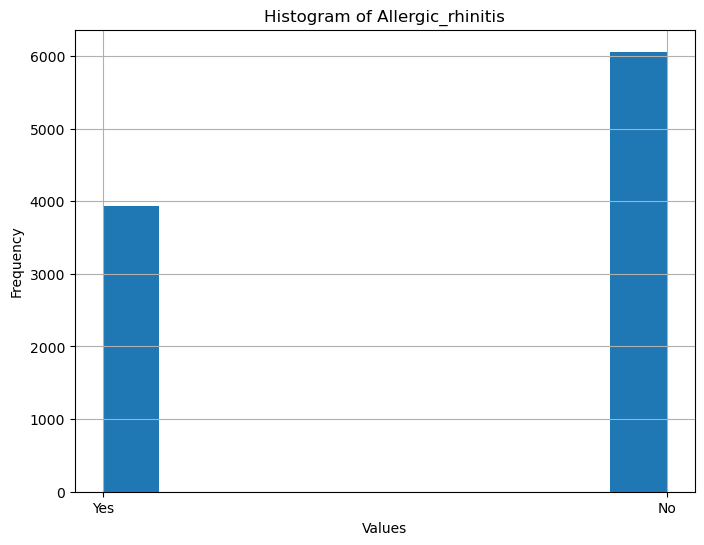

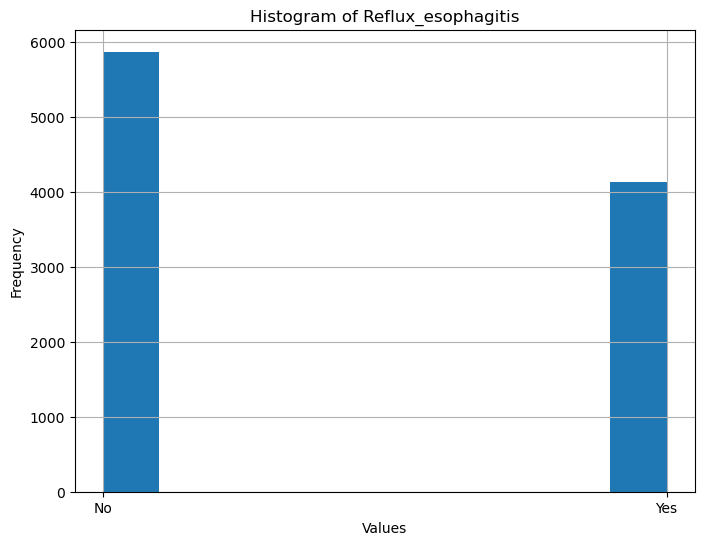

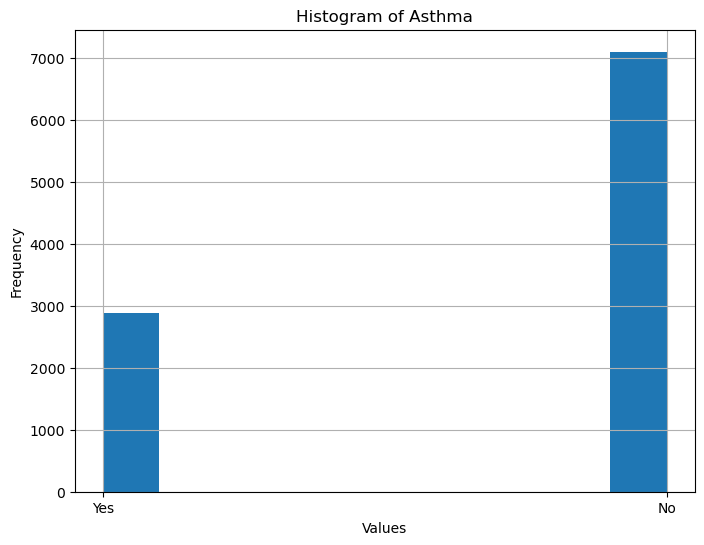

Missing data counts:
CaseOrder              0
Customer_id            0
Transaction_ID         0
Transaction_UID        0
City                   0
State                  0
County                 0
Zip                    0
Lat                    0
Lng                    0
Population             0
Area                   0
Timezone               0
Job                    0
Children               0
Age                    0
Education              0
Employment             0
Income                 0
Marital                0
Gender                 0
ReAdmis                0
VitD_levels            0
Doc_visits             0
Full_meals_eaten       0
VitD_supp              0
Soft_drink             0
Initial_admin          0
HighBlood              0
Stroke                 0
Complication_risk      0
Overweight             0
Arthritis              0
Diabetes               0
Hyperlipidemia         0
BackPain               0
Anxiety                0
Allergic_rhinitis      0
Reflux_esophagitis     0
Asth

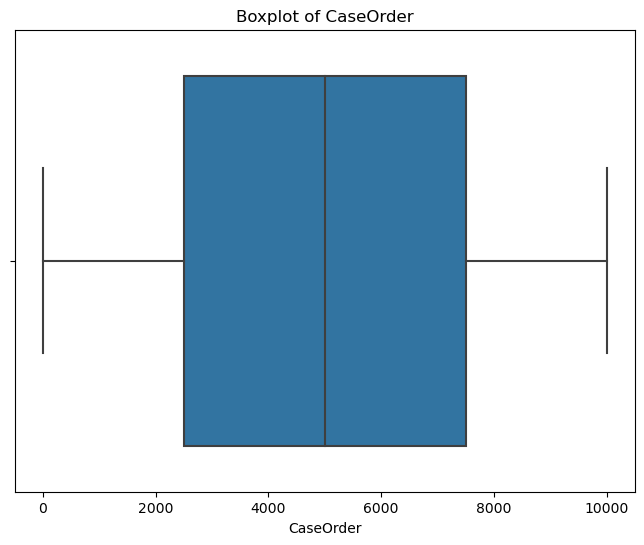

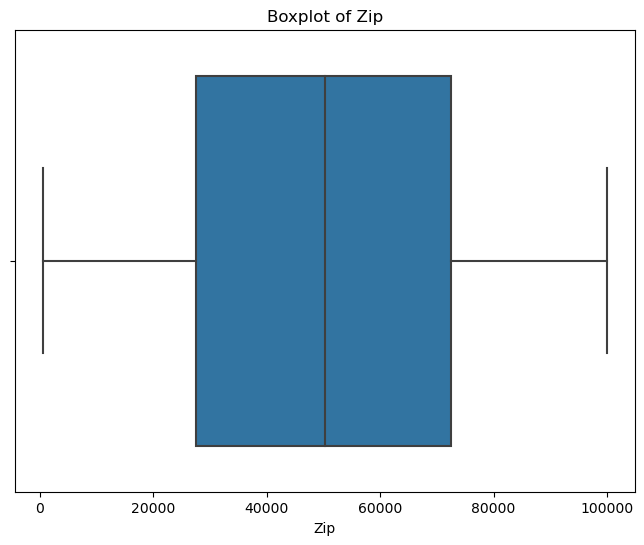

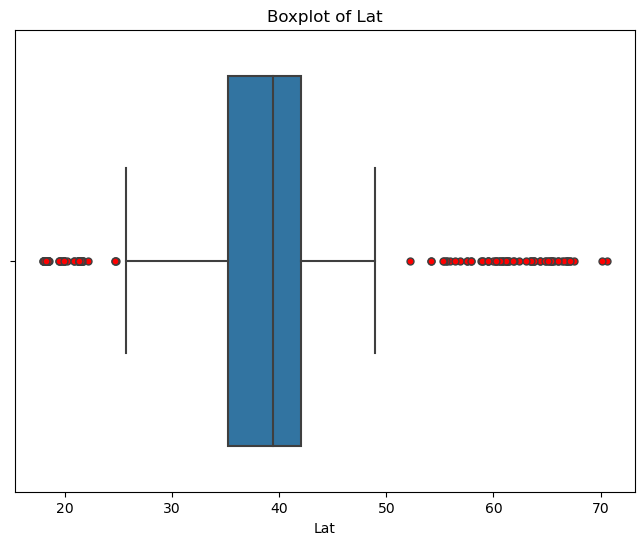

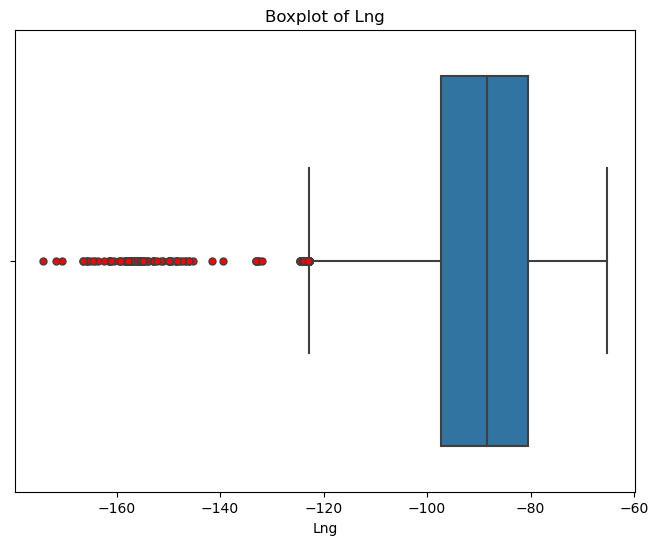

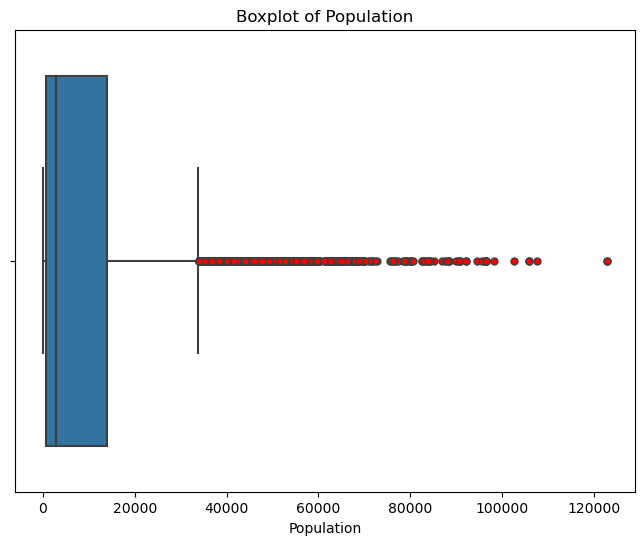

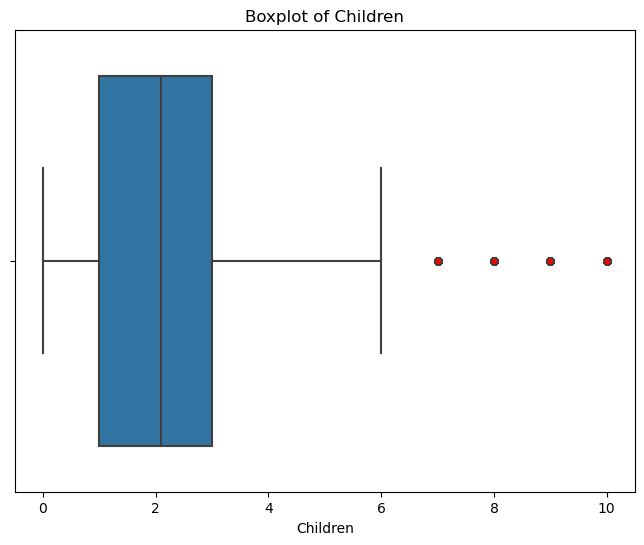

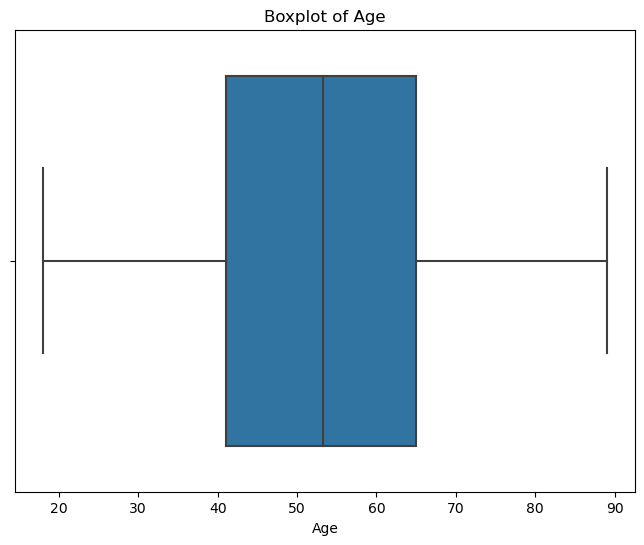

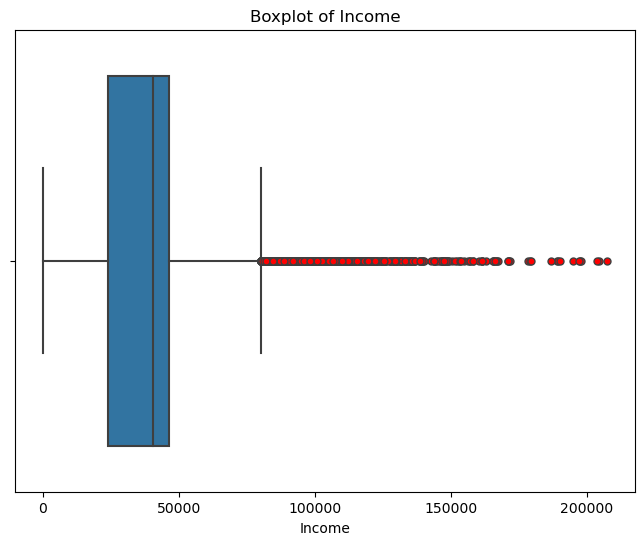

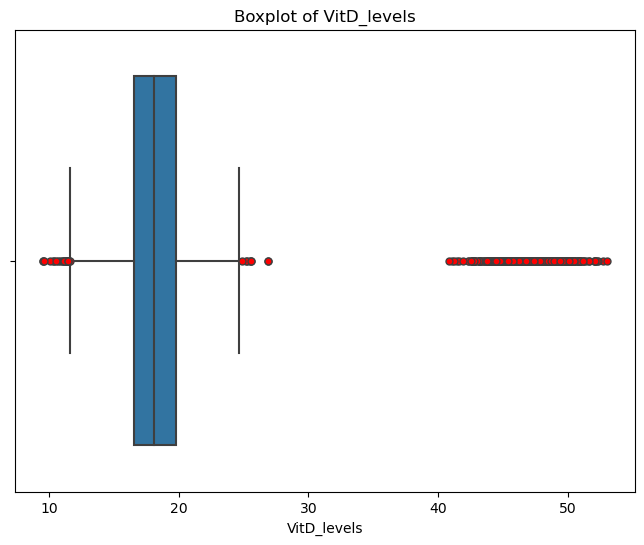

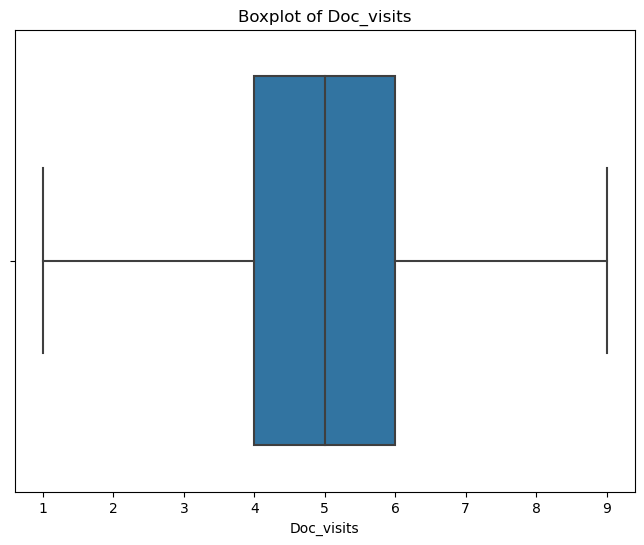

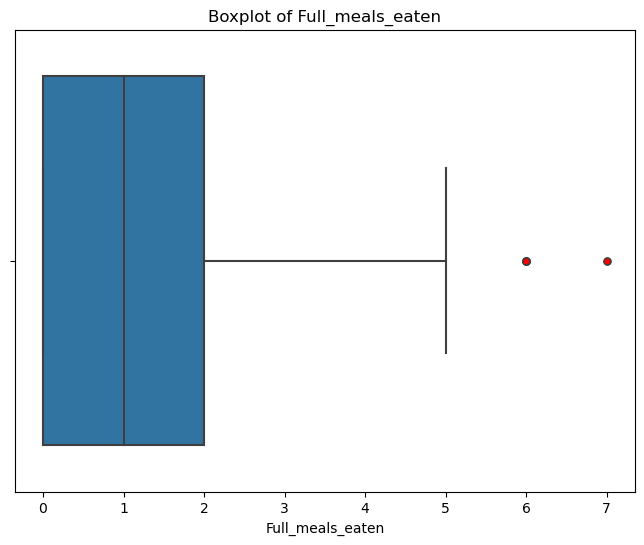

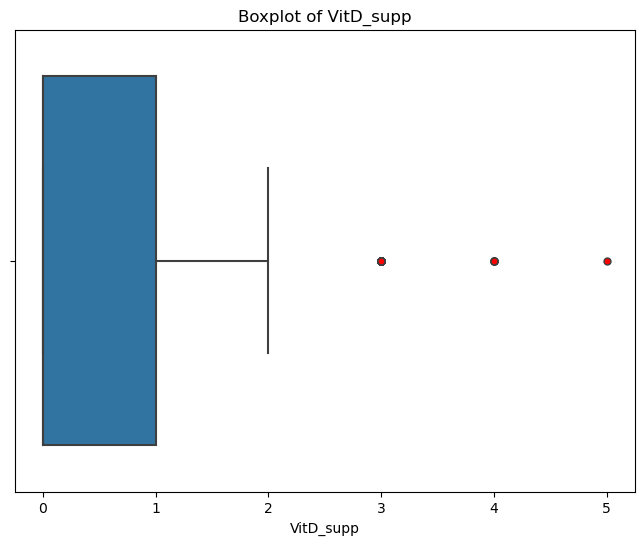

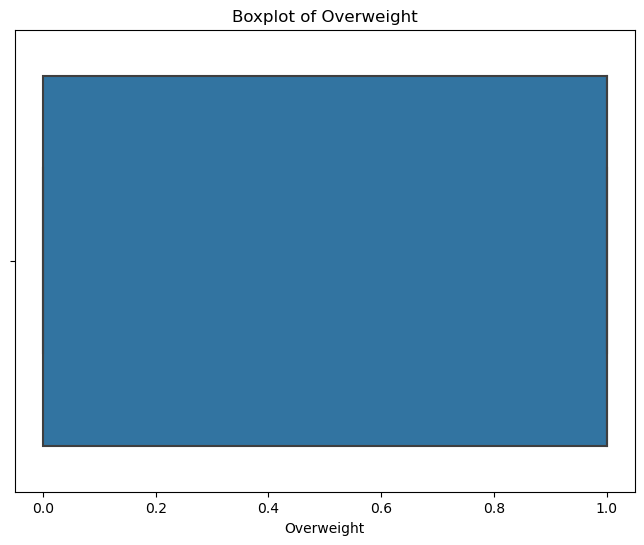

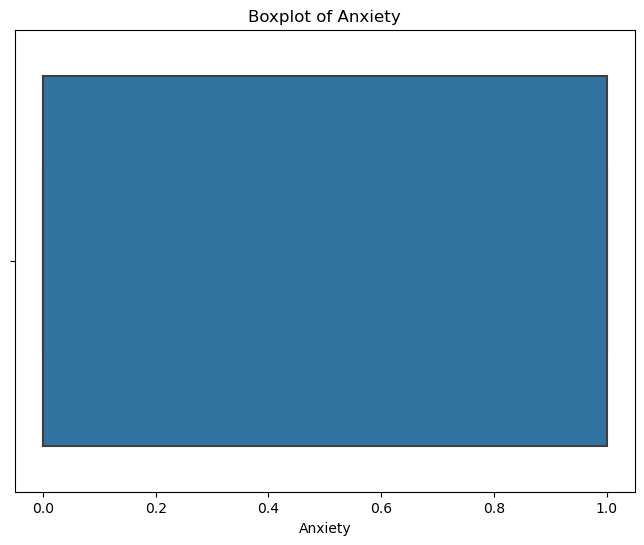

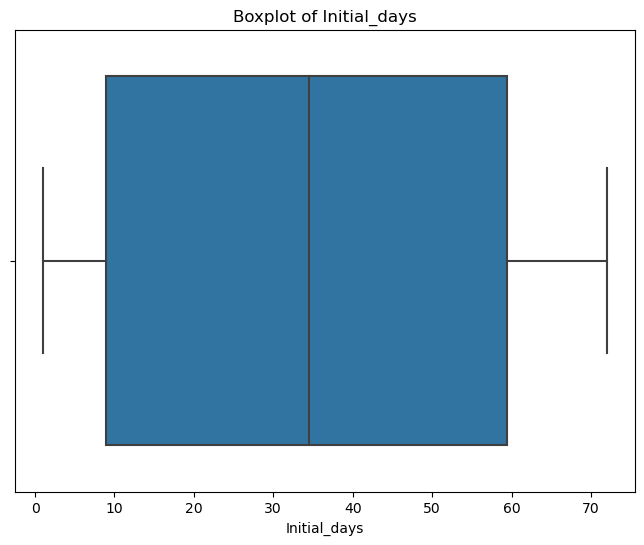

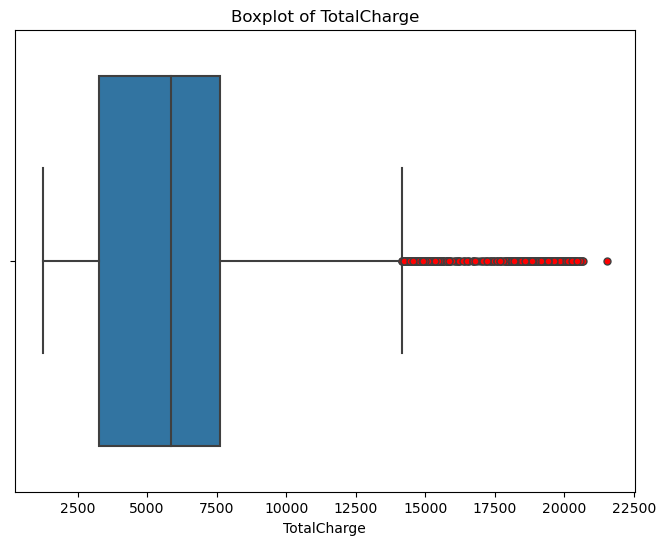

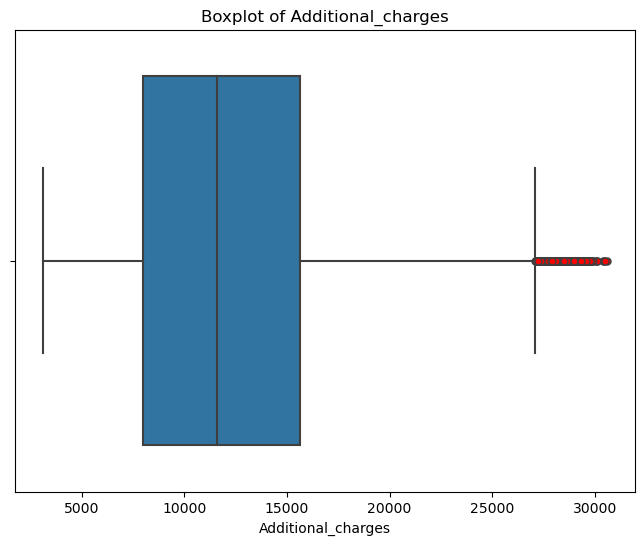

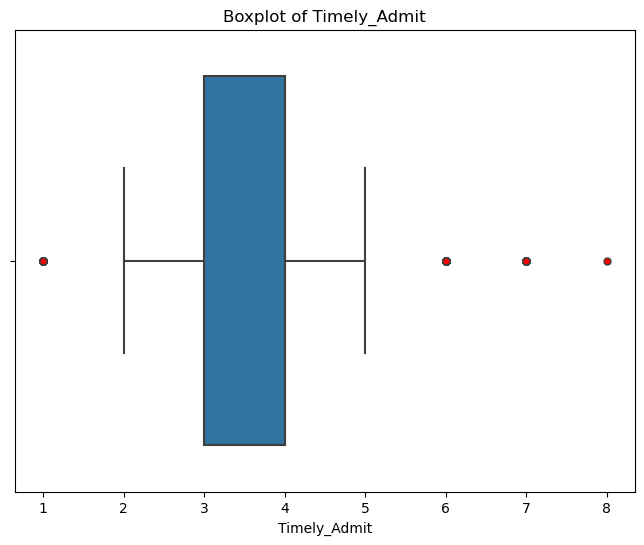

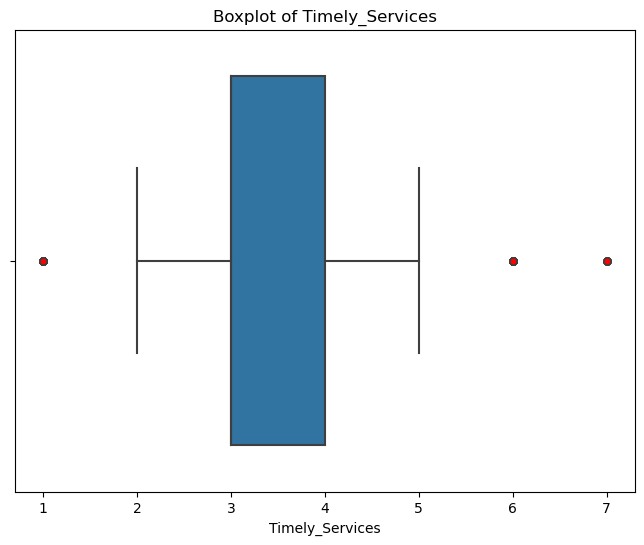

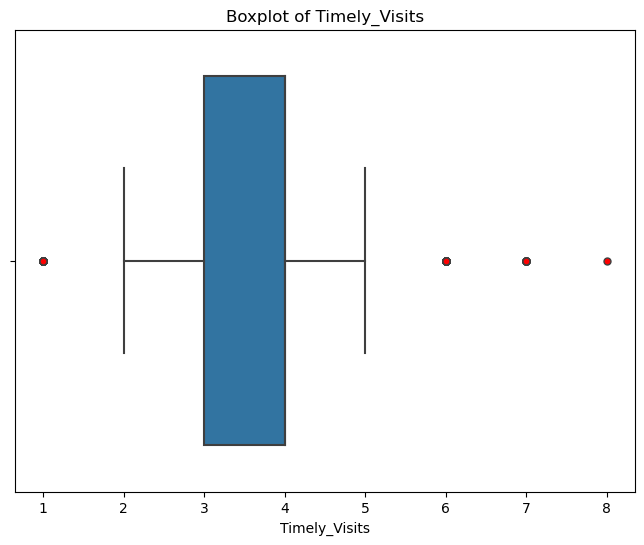

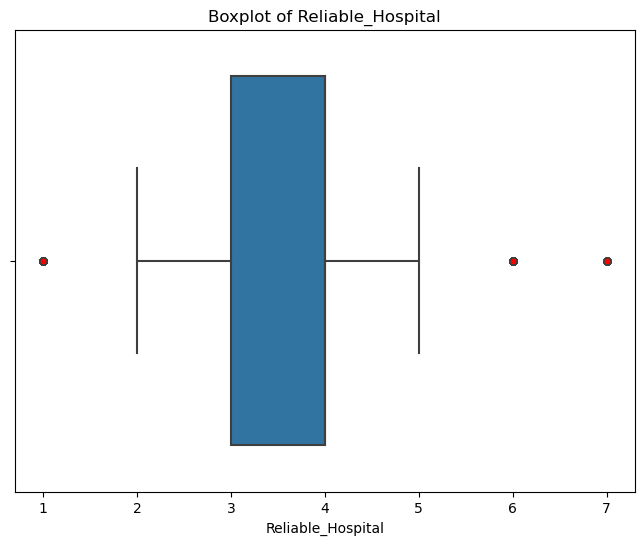

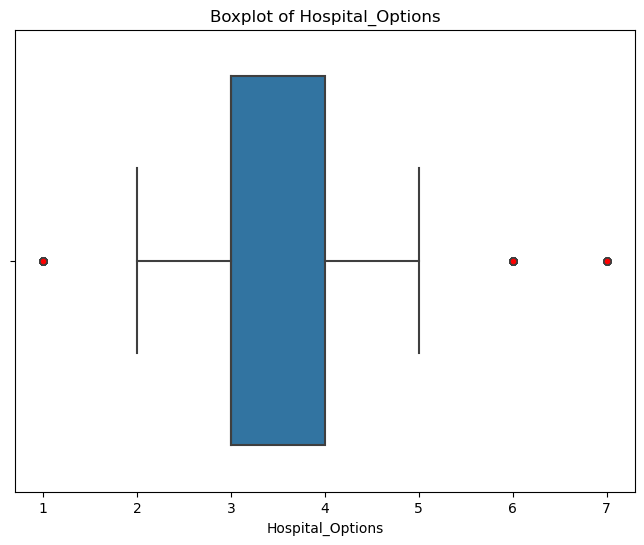

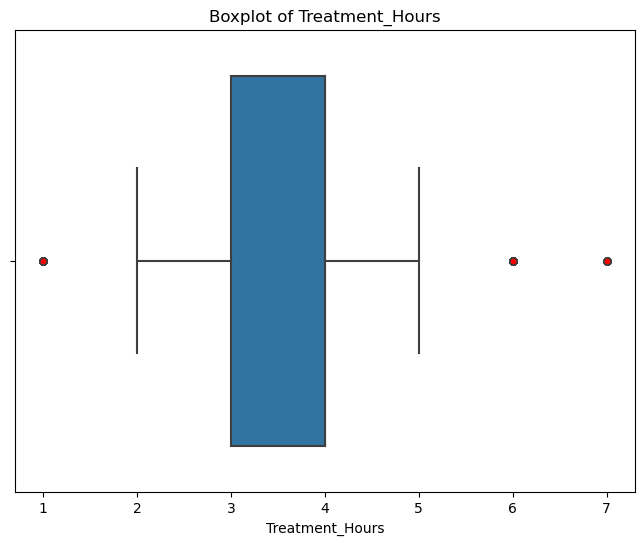

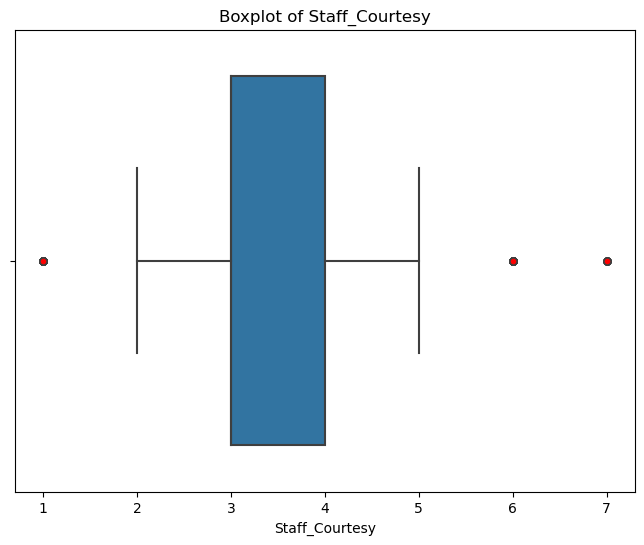

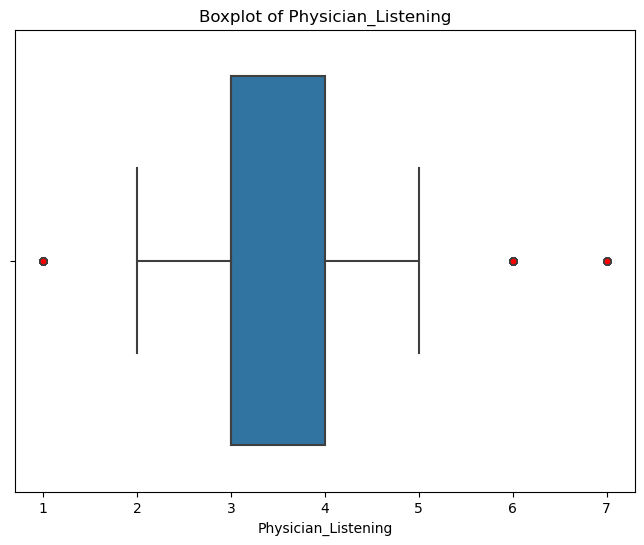

In [2]:
#import packages needed
import pandas as pd  #needed for overall data analysis
import matplotlib.pyplot as plt #needed for histograms and histograms
import seaborn as sns  # needed for boxplots

#load dataset (medical_raw_data) into Pandas and output results
PatientReadmit= pd.read_csv("medical_raw_data.csv")
print(PatientReadmit)

#python code to rename variables
PatientReadmit.rename(columns={'Interaction':'Transaction_ID', 'UID':'Transaction_UID',  'Item1':'Timely_Admit', 'Item2':'Timely_Services', 'Item3':'Timely_Visits', 'Item4':'Reliable_Hospital', 'Item5':'Hospital_Options', 'Item6':'Treatment_Hours', 'Item7':'Staff_Courtesy', 'Item8':'Physician_Listening'}, inplace=True)


# Drop first column
PatientReadmit = PatientReadmit.drop(columns=['Unnamed: 0'])

#python code to check data after drop of column
print(PatientReadmit)


#python code to check for duplicates
has_duplicates = PatientReadmit.duplicated().any()
print("Duplicates present:", has_duplicates)
# Check for missing data
missing_data = PatientReadmit.isnull().sum()

# Display the missing data counts
print("Missing data counts:")
print(missing_data)

# Columns to plot
columns_to_plot = ['HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',  'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']
# Iterate through each column and create a histogram
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.hist(PatientReadmit[column], bins=10)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Replace missing float64 values with the most frequent value (mean)
for column in PatientReadmit.columns:
    if PatientReadmit[column].dtype == 'float64':  # Check if the column has float64 data
        mean_value = PatientReadmit[column].mean()  # Calculate the mean
        PatientReadmit[column].fillna(mean_value, inplace=True)  # Fill missing values with mean
#Replace missing object values(mode)
column_to_fill = 'Soft_drink'
mode_value = PatientReadmit[column_to_fill].mode()[0]  # Compute mode
PatientReadmit[column_to_fill] = PatientReadmit[column_to_fill].fillna(mode_value)


# Check for missing data after replace
missing_data = PatientReadmit.isnull().sum()

# Display the missing data counts
print("Missing data counts:")
print(missing_data)

# Select numerical columns
numerical_columns = PatientReadmit.select_dtypes(include=['float64', 'int64'])
# Create boxplot for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=PatientReadmit[column], flierprops=dict(markerfacecolor='r', marker='o'))
    plt.title(f'Boxplot of {column}')
    plt.show()
